Machine learning and microscopy
=====================

Introduction
------------

* An introduction to some of the key ideas in applying machine learning to the analysis of microscopy data.
* Format is a brief introduction from me and then you start working with the tutorials.
* Feel free to move ahead to the advanced topics if you wish.

![Comp_Phys](images/comp_phys.png)

* Morning
    * Python and jupyter notebooks
    * Reading data - parsing files
    * Image analysis
* Afternoon
    * Machine learning - how and why?
    * Convolutional neural networks
    * Reinforcement learning


Why Python?
-----------

![python](images/python_logo.png)

* Scientific analysis is performed with a wide variety of languages and often the best performance can be achieved by matching the problem and language.
* However, this is not generally practical and most efforts in modern computational analysis are based on Python:
    * Easy to learn.
    * Easy to read (critical, as most research is collaborative).
    * Powerful scientific tools - most of the critical elements we need are already included, while well-supported libraries offer the rest.
    * It's free...
 
![python_comic](images/python_comic.png)
 
We also assume you know how to code to some degree, so we will focus on learning to use Python for scientific analysis rather than an introduction to Python in general.
 

An example from history
-----------------------

In 1888 Johannes Rydberg published his famous equation describing the wavelengths of light emitted from a hydrogen atom:

$\frac{1}{\lambda}=R\left(\frac{1}{m^2}-\frac{1}{n^2}\right)$

where $R$ is the Rydberg constant $R=1.097 \times 10^{-2}$nm$^{-1}$, and $m$ and $n$ are positive integers. For a given value of $m$, the wavelengths $\lambda$ given by this formula for all $n \gt m$ form a series. The first three of these series, for $m=1,2,3$, are named after their discoverers Lyman, Balmer and Paschen respectively.

Let's make a simple Python code that solves this equation for $m=1,2,3$ and outputs the results.

In [ ]:
R = 1.097e-2
for m in [1,2,3]:
    print("Series for m =",m)
    for k in [1,2,3,4,5,6]:
        n = m + k 
        invlambda = R*(1/m**2-1/n**2)
        print(" ",1/invlambda,"nm")

The agreement with experiment is actually remarkably good, with the differences due to small details of the electronic structure (spin, relativistic corrections, hyperfine splitting).

Practical Python test
---------------------

As a test that you can actually get Python code running on your system, try to re-run the Rydberg code yourself. You have several options for running Python:

* Just type `python` at the command prompt and it should give you something like this:

```
Python 3.7.4 (default, Aug 13 2019, 15:17:50)
[Clang 4.0.1 (tags/RELEASE_401/final)] :: Anaconda, Inc. on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> 
```
then you can just type your code or paste it from a text file.

* You can use something like `idle`,`spyder` or any other Python flavoured development environment you prefer.
* We are generally using `jupyter-lab`, a recent update of the `jupyter-notebook` environment. 
* Use Python 3, as 2 is being depreciated and 1 is dead - differences are minor and Google is your friend.
* For your own computer, we recommend installing **Anaconda**, as it provides everything you could need for computational physics in Python.

![jupyter](images/jupyter.png)
![anaconda](images/anaconda.png)

Python programming
=================================

## Coding tips

* Include comments - even if no-one else uses the code, when you need to use something after a year or more, you will be very happy you added sensible comments.
* Keep it simple and readable *unless* there is a very good efficiency reason not to.
* Document your code - for anything beyond the very simple, a manual can be the difference between death and everlasting (computational) life. For more complex codes, tutorials are also critical.
* If you do all of this, make it **open** and enjoy interacting with the whole computational physics world.

<!-- ![Git](images/git.jpg) -->
![GitHub](images/github.png)

# More resources

For more (and almost endless options) you can begin with the [official Python tutorial](https://docs.python.org/3/tutorial/index.html).

Functions, packages and modules
-------------------------------

While many useful mathematical functions can usually be evaluated with a combination of standard Python commands, it is often easier and computationally more efficient to use imported functions from a package. Lists of common packages and the functions they contain can be easily obtained from Python documentation, but `math` is an obviously useful beginning.


While you can import all functions from a given package:

```python
from math import *
```

```python
import math
x = math.sqrt(10)
```

this is generally dangerous, as you may be including duplicate functions you are unaware of. Much better to begin your code with an import of everything you will actually use. This is also generally easier to read than using modules.

In [ ]:
from math import log,cos,sqrt,pi

bored_var = int(input("Enter your level of interest in this course (1-10): "))

if bored_var>10:
    print("You are lying.")
    bored_var = cos(pi)
    print(bored_var)
elif bored_var<1:
    print("You are dying.")
    bored_var = sqrt(pi)
    print(bored_var)
else:
    while bored_var<10:
        print("Be happy!")
        bored_var = bored_var + log(10)
        print(bored_var)


Lists and arrays
----------------

Once we move into handling real data from a physical problem, it is hardly practical to assign every value to a different variable, and the use of *containers* becomes important. Python has both *lists* and *arrays*, and they are suited to different tasks commonly encountered in computational physics.

* Lists...
    * contain elements which can be of any type e.g. `int`,`float`.
    * can have elements added and remove after creation.
    * are one-dimensional.
* Arrays...
    * contain elements of the same type.
    * have a fixed numbed of elements.
    * can have any dimension.
    * behave properly with respect to arithmetic operations.
    * are computationally more efficient than lists.

### List example

Let's define a simple list:

In [ ]:
simple_list = list(range(1,11))
print(simple_list)

This is just a list of integers, produced using the `range` function and converted to a list. Then there a several functions that work directly on lists:

### Arrays

For most problems, arrays are likely to be more useful as we are commonly dealing with well-defined data sizes and physical quantities e.g. vectors. In Python the tools for manipulating arrays are contained within the *numpy* package.

In [ ]:
from numpy import zeros,ones,empty
zero_mat = zeros([3,3],float)
one_mat = ones([3,3],float)
empty_mat = empty([3,3],float)
print(zero_mat)
print(one_mat)
print(empty_mat)

* Note that `empty` does not create an *empty* array, it just uses whatever numbers it has in memory. 
* Both the `zeros` and `ones` functions actually use time to create, so if you just need an empty array ready to be filled, `empty` is more efficient. 
* But remember it will not actually be **empty**...

In [ ]:
sub_mat = one_mat - empty_mat
print(sub_mat)

Then you can also use the `map` function to apply any function to a list:

In [ ]:
from math import exp
exp_list = list(map(exp,simple_list))
print(exp_list)

### Reading data into arrays

Most often you will want to read in the values of an array from a external source, such as a text file. 

Here we can combine some of the previous lists we generated into an array (assuming they have the same length) and use this as our *data*. We will then write it to a file and read it again...which obviously makes no sense, but demonstrates the functions needed.

In [ ]:
from numpy import array,loadtxt,savetxt
print("List 1",simple_list)
print("List 2",exp_list)
output_array = array([simple_list,exp_list],float)
print("Combined array")
print(output_array)
savetxt("array_data.txt.gz",output_array) # save in gzipped format, since the data is so huge...
input_array = loadtxt("array_data.txt",float)
print("Read array")
print(input_array)

#### Example - Weathered

* Let's try and get our own data, read it in and analyze it using Python. 
* You can use whatever you want, but we will use a simple CSV file containing weather data for this example.

It has this format:

```
Year,m,d,Time,Time zone,Maximum temperature (degC)
2004,7,15,00:00,UTC,18.5
2004,7,16,00:00,UTC,21.3
2004,7,17,00:00,UTC,20.6
2004,7,18,00:00,UTC,21.9
2004,7,19,00:00,UTC,23.2
2004,7,20,00:00,UTC,20.3
....
```

and can be parsed like this:

```python
from numpy import array,loadtxt
weather_array = loadtxt('weather.txt', skiprows=1, delimiter=',', usecols=(0,5), unpack=True, dtype=None)
```
Now calculate the number of values in your data, the sum of them and the arithmetic mean...or whatever you thinks makes sense for the data you are using. 

In [ ]:
#%%timeit # comment out print statements when testing speed. This is an iPython magic function.
from numpy import loadtxt,mean
weather_array = loadtxt('weather.txt', skiprows=1, delimiter=',', usecols=(0,5), unpack=True, dtype=None)

weather_mean = sum(weather_array[1])/len(weather_array[1])
weather_2004 = []
weather_2005 = []
rng = range(len(weather_array[1]))

for n in rng:
   if (weather_array[0,n] == 2004):
       weather_2004.append(weather_array[1,n])
   elif (weather_array[0,n] == 2005):
       weather_2005.append(weather_array[1,n])

weather2004_mean = sum(weather_2004)/len(weather_2004)
weather2005_mean = sum(weather_2005)/len(weather_2005)

print("Mean temperature:",weather_mean)
print("2004 mean:",weather2004_mean)
print("2005 mean:",weather2005_mean)


While this is an intuitive (*old school* perhaps) way to solve the problem, it is not a very *pythonic* approach to the problem...it can also be done as follows:

In [ ]:
#%%timeit # comment out print statements when testing speed
from numpy import loadtxt,mean,where
weather_array = loadtxt('weather.txt', skiprows=1, delimiter=',', usecols=(0,5), unpack=True, dtype=None)

weather_mean = weather_array[1, :].mean()
weather2004_mean = weather_array[1, where(weather_array[0] == 2004)].mean()
weather2005_mean = weather_array[1, where(weather_array[0] == 2005)].mean()
print("Mean temperature:", weather_mean)
print("2004 mean:", weather2004_mean)
print("2005 mean:", weather2005_mean)

The approach you choose should really balance readability and efficiency...but for the latter, you should really only worry about functions that are used heavily.

# Graphics and visualization

It is already evident for several examples that we have looked at that it would be useful to have ways to visualize the data and for real problems this is normally the key to actually getting to the science. Let's start by plotting perhaps the most classic of functions, `sin`.

In [ ]:
from numpy import sin,linspace # generally these are faster than the in-built Python functions
import matplotlib.pyplot as plt # useful for functions you will use a lot, but be careful that you don't lose track

x = linspace(0,10,100) # create a float array with values from 0 - 10 with 100 intervals
y = sin(x)

plt.plot(x,y,'ro') # plot a dashed line in red
plt.show()

This is clearly very basic, but the options with the matplotlib library are very extensive (and there is a wealth on information online explaining them) and we can easily add a lot more information in the same manner.

In [ ]:
from numpy import sin,cos,exp,linspace 
import matplotlib.pyplot as plt 

x = linspace(0,10,100) 
y_sin = sin(x)
y_cos = cos(x)
y_exp = 1/exp(x)

plt.figure(figsize=(7.5,5)) # set the figsize
plt.rc('font',size=16) # set the font size

plt.plot(x,y_sin,'b--',label='sin(x)')
plt.plot(x,y_cos,'m--',label='cos(x)') # adds the second plot to the graph, then we plot the whole lot at the end with show()
plt.plot(x,y_exp,'r--',label=r'$\frac{1}{\exp(x)}$') # the 'r' forces this to be read as a raw string and the '\' is ignored by Python.

plt.title('The classics',fontsize=20)
plt.xlabel('x')
plt.ylabel('Function(x)')
plt.legend(fontsize=12)

plt.show() # notice that we don't need to include this in a Jupyter notebook, but it is good practice.


# Fourier transforms

The Fourier transform is one of the most important, and widely used, tools in traditional theoretical physics, and it is also very useful in scientific analysis. 

In general, it allows us to break down functions (or signals) into the components for analysis, smoothing or filtering, and it also allows us to greatly increase the speed of certain calculations e.g. the diffusion equation or the Schrödinger equation. 

![Fourier cat](images/fourier.jpg)

### Discrete cosine transforms

For generality we introduced the complex form of the Fourier transform, but there are many practical cases where it makes more sense to use the cosine transform (the sine form is much more rarely used since it requires the function to be zero at $x=0$ and $x=L$). If we return to the cosine series:

$$f(x)=\sum_{n=0}^{\infty}\alpha _k cos\left(\frac{2 \pi kx }{L}\right)$$

we already noted that this is only valid for even functions i.e. those that are symmetric about the midpoint. This might initially seem a major flaw, but any function can be made even by adding it to a *mirror image* of itself and then repeating it. This means that the number of samples, $N$, is also always even.

Once we have a symmetric function, it is simply a special case for $c_k$ when $y_n$ is symmetric about $x=\frac{1}{2}L$ with $y_n=y_{N-n}$ for all $n$. Given that $N$ is even, we can rewrite the equation for the coefficients as follows (noting that $e^{i2\pi k}=1$ for all integer $k$):

$$c_k = \sum_{n=0}^{N-1}y_n \exp \left(-i\frac{2 \pi kn }{N}\right)$$

$$= \sum_{n=0}^{\frac{1}{2}N}y_n \exp \left(-i\frac{2 \pi kn }{N}\right) + \sum_{n=\frac{1}{2}N+1}^{N-1}y_n \exp \left(-i\frac{2 \pi kn }{N}\right)$$

$$= \sum_{n=0}^{\frac{1}{2}N}y_n \exp \left(-i\frac{2 \pi kn }{N}\right) + \sum_{n=\frac{1}{2}N+1}^{N-1}y_{N-n} \exp \left(i\frac{2 \pi k(N-n) }{N}\right)$$

Making a change of variables such that $N-n \rightarrow n$ and using the identity $cos\theta = \frac{1}{2}(e^{-i\theta}+e^{i\theta})$ we get the *discrete cosine transform (DCT)*:

$$c_k = \sum_{n=0}^{\frac{1}{2}N}y_n \exp \left(-i\frac{2 \pi kn }{N}\right) + \sum_{n=1}^{\frac{1}{2}N-1}y_n \exp \left(i\frac{2 \pi kn }{N}\right)$$

$$= y_0 + y_{\frac{N}{2}}cos\left(\frac{2\pi k(\frac{N}{2})}{N} \right) + 2\sum_{n=1}^{\frac{1}{2}N-1}y_n cos \left(\frac{2 \pi kn }{N}\right) $$

The inverse of this is very similar, differing only by the leading $\frac{1}{N}$ term:

$$y_n = \frac{1}{N}\left[ c_0 + c_{\frac{N}{2}}cos\left(\frac{2\pi k(\frac{N}{2})}{N} \right) + 2\sum_{n=1}^{\frac{1}{2}N-1}c_k cos \left(\frac{2 \pi kn }{N}\right)\right] $$


Note that it is common to see DCT formulations where the sampling is taken at the *midpoint* of the sample intervals, known at a "Type-II" DCT, which is effectively the same, but implies that $y_n = y_{N-1-n}$ and for an even $N$:

$$c_k= \sum_{n=0}^{\frac{1}{2}N-1}y_n \exp \left(-i\frac{2\pi kn}{N}\right) + \sum_{n=\frac{1}{2}N}^{N-1}y_n \exp \left(-i\frac{2\pi kn}{N}\right)$$

$$= \exp \left(i\frac{\pi k}{N}\right) \left[ \sum_{n=0}^{\frac{1}{2}N-1}y_n \exp \left(-i\frac{2\pi k(n+\frac{1}{2})}{N}\right) + \sum_{n=\frac{1}{2}N}^{N-1}y_{N-1-n} \exp \left(i\frac{2\pi k(N-\frac{1}{2}-n)}{N}\right) \right]$$

$$= \exp \left(i\frac{\pi k}{N}\right) \left[ \sum_{n=0}^{\frac{1}{2}N-1}y_n \exp \left(-i\frac{2\pi k(n+\frac{1}{2})}{N}\right) + \sum_{n=0}^{\frac{1}{2}N-1}y_{n} \exp \left(i\frac{2\pi k(n+\frac{1}{2})}{N}\right) \right]$$

$$= 2\exp \left(i\frac{\pi k}{N}\right) \sum_{n=0}^{\frac{1}{2}N-1}y_n cos \left(\frac{2\pi k(n+\frac{1}{2})}{N}\right) $$

Conventionally the leading phase factor is included in the Fourier coefficients such that:

$$a_k = 2 \sum_{n=0}^{\frac{1}{2}N-1}y_n cos \left(\frac{2\pi k(n+\frac{1}{2})}{N}\right) $$

and the inverse is:

$$y_n=  \frac{1}{N}\left[ a_0 + 2\sum_{k=1}^{\frac{1}{2}N-1}a_k cos \left(\frac{\pi k(n+\frac{1}{2})}{N}\right)\right]$$

redefining $\frac{1}{2}N \rightarrow N$ and $a_k \rightarrow 2a_k$ this is often written as follows:

$$a_k= \sum_{n=0}^{N-1}y_n cos \left(\frac{\pi k(n+\frac{1}{2})}{N}\right), y_n=  \frac{1}{N}\left[ a_0 + 2\sum_{k=1}^{N-1}a_k cos \left(\frac{\pi k(n+\frac{1}{2})}{N}\right)\right]$$

#### DCT and compression

DCTs are behind a lot the original compression algorithms used in music, image and video files. 

* In particular JPEGs are constructed by dividing an image in to blocks, performing DCTs on these blocks and then filtering the resultant coefficients to remove *small* contributions to the signal. 
* When you open a JPEG file it applies a version of an iDCT to reconstruct the original image from the stored coefficients, including compression artifacts if important coefficients have been discarded. 
* MP3s take the filtering to the next stage by keeping coefficients that makes sense from the perspective of what the human ear can hear. 

### Two-dimensional Fourier transforms

Before we explore the potential of Fourier transforms for 2D data, it is worth looking a little at the basic equations behind it. For a 2D function $f(x,y)$, we need to transform first with respect to $x$ and then with respect to $y$. If we have an $M \times N$ grid of data, we first perform an ordinary Fourier transform on each of the $M$ rows:

$$c^\prime_{ml} = \sum_{n=0}^{N-1}y_{mn} \exp \left(-i\frac{2 \pi ln }{N}\right)$$

For each row $m$ we now have $N$ coefficients, one for each value of $l$. Next we take the $l$th coefficient in each of the $M$ rows and Fourier transform these $M$ values again to get:

$$c_{kl} = \sum_{m=0}^{M-1}c^\prime_{ml} \exp \left(-i\frac{2 \pi km }{M}\right)$$

If we now combine these, we can formulate a complete expression for the Fourier transform in 2D:

$$c_{kl} = \frac{1}{MN}\sum_{m=0}^{M-1}\sum_{n=0}^{N-1}y_{mn} \exp \left[-i2\pi \left(\frac{km}{M}+\frac{ln}{N}\right)\right]$$

with the corresponding inverse transform as follows:

$$y_{mn} = \frac{1}{MN}\sum_{m=0}^{M-1}\sum_{n=0}^{N-1}c_{kl} \exp \left[i2\pi \left(\frac{km}{M}+\frac{ln}{N}\right)\right]$$

We can see this in action by coding (a very basic) compression algorithm for an image. 

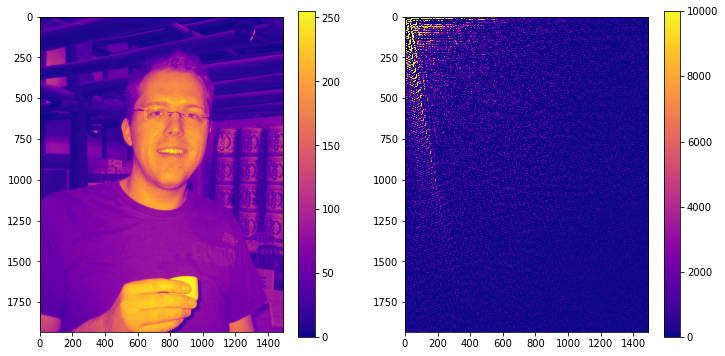

Removed 2880806 out of 2882544 components. Image contains 0.06% of the original components.


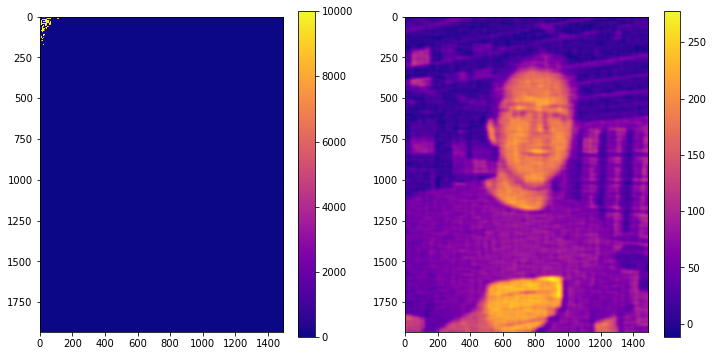

Now we have really reduced the array to 0.06% of its original size.


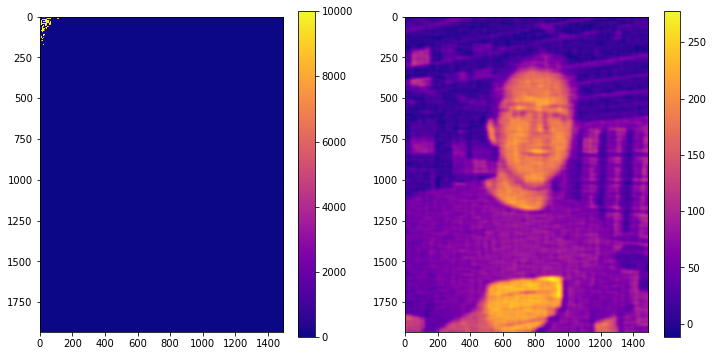

In [13]:
from numpy import empty,arange,exp,real,imag,pi,array,place,argwhere,size
from numpy.fft import rfft,irfft
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

# Numpy does not have DCT directly, so we have to do it manually - note that scipy does have it, but this is a useful teaching example
######################################################################
# 1D DCT Type-II function

def dct(y):
    N = len(y)
    y2 = empty(2*N,float) # create an empty array for the function
    y2[:N] = y[:] # the first N elements of y2 are taken from y
    y2[N:] = y[::-1] # the elements after N are reversed giving us a symmetric, even function

    c = rfft(y2) # perform the fourier transform. This uses a numpy function (Real Fast Fourier Transform), otherwise everything takes too long - we will discuss it later.
    phi = exp(-1j*pi*arange(N)/(2*N)) # create an array with terms from (0-999) and use it to define the leading phase factor
    return real(phi*c[:N]) # return the real part of the transform

######################################################################
# 2D DCT function

def dct2(y):
    M = y.shape[0] # first dimension of input function, use to define limits
    N = y.shape[1] # second dimension of input function, use to define limits
    a = empty([M,N],float) # create arrays to store our result - a for the first transform and b for the second
    b = empty([M,N],float)

# run the 1D transforms
    for i in range(M):
        a[i,:] = dct(y[i,:])
    for j in range(N):
        b[:,j] = dct(a[:,j])

    return b

######################################################################
# 1D inverse DCT Type-II function

def idct(a):
    N = len(a)
    c = empty(N+1,complex)

    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N] # (Inverse Real Fast Fourier Transform)

######################################################################
# 2D inverse DCT function

def idct2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idct(b[i,:])
    for j in range(N):
        y[:,j] = idct(a[:,j])

    return y

adam = plt.imread('images/photo.tiff') # Read in TIFF picture file. TIFF is lossless, so generally very large compared to compressed formats.

singch_adam = adam[:, :, 0] # slice image into a single channel so the transform can handle it.
plt.figure(figsize=(12,6)) # set the figsize

# plot the original image
plt.subplot(1,2,1)
plt.imshow(singch_adam, cmap="plasma") # a default colourmap is applied, there are no colour channels in the data anymore
plt.colorbar()
adam_dct = dct2(singch_adam) # apply the 2D DCT to the single channel image

# plot the DCT of the image, limiting the scale so we can actually see something
plt.subplot(1,2,2)
plt.imshow(adam_dct, cmap="plasma",clim=(0, 1e4))
plt.colorbar()
plt.show()

# define a threshold for cutting the coefficients
cutoff_amplitude = 1e6 # 
place(adam_dct, abs(adam_dct) < cutoff_amplitude, [0]) # Put zeroes into array based on cutoff
original_size = adam_dct.shape[0]*adam_dct.shape[1]
components_removed = argwhere(abs(adam_dct) < cutoff_amplitude).shape[0] # Replace values below cutoff with 0

# give some nice output on how much we have cut from the DCT
percent_removed = (1-components_removed/original_size)*100
print("Removed {} out of {} components. Image contains {:.2f}% of the original components.".format(components_removed, original_size, percent_removed))

plt.figure(figsize=(12,6)) # set the figsize
plt.subplot(1,2,1)
plt.imshow(adam_dct, cmap="plasma",clim=(0, 1e4))
plt.colorbar()

adam_idct = idct2(adam_dct) # run the inverse DCT on the coefficients to generate the "compressed" image

plt.subplot(1,2,2)
plt.imshow(adam_idct, cmap="plasma")
plt.colorbar()
plt.show()

# now actually remove all the zeroes so that we are really handling a smaller array
adam_compressed = coo_matrix(adam_dct)
print("Now we have really reduced the array to {:.2f}% of its original size.".format(100*size(adam_compressed)/size(adam_dct)))

# but to actually do anything with it, we need to decompress it and see whether we lost any data.
adam_decomp = adam_compressed.toarray()

plt.figure(figsize=(12,6)) # set the figsize
plt.subplot(1,2,1)
plt.imshow(adam_decomp, cmap="plasma",clim=(0, 1e4))
plt.colorbar()

adam_idct_decomp = idct2(adam_decomp)

plt.subplot(1,2,2)
plt.imshow(adam_idct_decomp, cmap="plasma")
plt.colorbar()
plt.show()

plt.imsave('images/photo_compressed',adam_idct_decomp, format='tiff') # but this is still the same size, as we had to decompress it.


Tutorials
=====================


1. Make sure you can run the simple python examples in the first part of the introduction - explore whether you prefer the simplicity of the command line or the options in Jupyter.
2. Select a data file from `examples/data` (or use your own) and parse it into an array. Calculate some properties from the data e.g. average, sum.
3. Select an image file from `examples/images` (or use your own) and compress it using the simple Fourier approach. Explore how the parameters affect the quality and ultimate size of the compressed image.
4. "OpenCV"

### OpenCV

OpenCV (Open Source Computer Vision Library) is a library of programming functions aimed at real-time computer vision.

In [ ]:
# ???s

### Video in OpenCV

As a video example for OpenCV, we can design a heartrate monitor. This monitor uses brightly backlight video of finger, pressed at the camera lens, and calculates the heartrate

In [59]:
import cv2
import numpy as np

cap = cv2.VideoCapture('examples/data/heart_rate.mp4')

In [60]:
data = []
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    data.append(np.mean(frame[:, :, 2]))
cap.release()

Can't receive frame (stream end?). Exiting ...


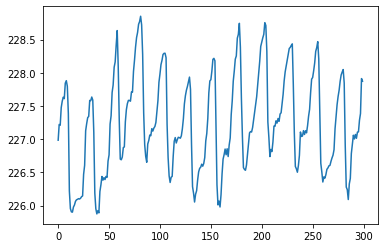

In [61]:
plt.plot(data)

Text(0, 0.5, 'coefficient magnitude')

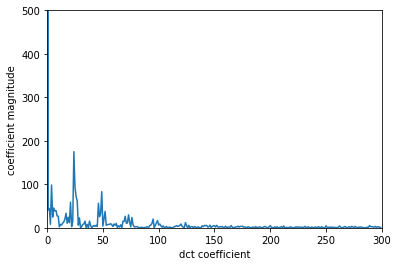

In [72]:
fig, ax = plt.subplots()

ax.plot(np.abs(dct(data)))
ax.set_ylim([0, 500])
ax.set_xlim([0, 300])

ax.set_xlabel("dct coefficient")
ax.set_ylabel("coefficient magnitude")